In [1]:
#import TensorFlow and Keras API
import tensorflow as tf
from tensorflow import keras

#other imports
import numpy as np
import matplotlib.pyplot as plt

import os
from pathlib import Path

import cv2
import time

##Enter following line into Anaconda powershell if running this for the first time
# pip install opencv-python

In [2]:
def ReturnCatagories(main_path):
    main_path = main_path
    Catagories = os.listdir(main_path)
    if Catagories[0].lower() == 'test':
        Catagories = os.listdir(main_path + '/Test')
    return(Catagories)

In [3]:
def FormatImgData(main_path, Catagories, IMG_Height, IMG_Width):
    main_path, Catagories, IMG_Height, IMG_Width = main_path, Catagories, IMG_Height, IMG_Width
    #needed imports
    import os    
    #Stop if folder does not contain all catagories
    #Warn if folder contains more than catagories
    for i in Catagories:
        if i not in os.listdir(main_path):
            print('Point main_path to a folder containing all specified catagories')
            return
    if len(Catagories) < len(os.listdir(main_path)):
        print('StoreImageArray - WARNING: More folders found than catagories specified')
    
    import cv2
    #iterate over catagories to create arrays and store in "data"
    data = []
    for catagory in Catagories:
        class_num = Catagories.index(catagory) #store catagory as int
        cat_path = os.path.join(main_path,catagory)
        for img in os.listdir(cat_path):
            img_path = os.path.join(cat_path,img) #get image path
            try:
                img_array = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE) #read and change to grayscale/color
                norm_array = cv2.resize(img_array, (IMG_Height,IMG_Width)) #resize images
                norm_array = norm_array / 255 #convert to normalized binary image data
                data.append([norm_array, class_num])
            except Exception as e: #disregard unreadable files
                pass
    #Shuffle data
    np.random.shuffle(data)
    
    return(data)

In [4]:
#Set main folder file path
main_path = "C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks/Cat vs Dog Dataset"

#Store data catagories as list
Catagories = ReturnCatagories(main_path=main_path)

#Store data as formatted grayscale array, catagory number pairs
IMG_Height = 150
IMG_Width = 150

data = FormatImgData(main_path=main_path, Catagories=Catagories,
                     IMG_Height=IMG_Height, IMG_Width=IMG_Width)

In [5]:
#Lost a few data points due to errors with the image files
print('Data Length: {}'.format(len(data)))

Data Length: 2994


In [6]:
#check some data to ensure it looks correct
def PlotSomeData(data,Catagories,num):
    data, Catagories, num = data, Catagories, num
    
    sqr = np.ceil(num**.5)
    
    plt.figure(figsize=(10,10))
    for i in range(num):
        plt.subplot(sqr,sqr,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(data[i][0], cmap='binary')
        plt.xlabel(Catagories[data[i][1]])
    plt.show()

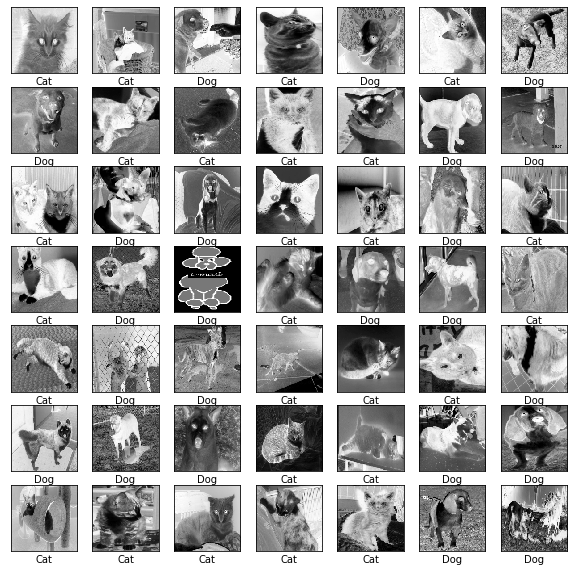

In [7]:
PlotSomeData(data=data,Catagories=Catagories,num=49)

In [8]:
#Putting data into X,Y format
def CreateXY(data):
    data = data
    X = []
    Y = []
    for img,category in data:
        X.append(img)
        Y.append(category)
    X = np.array(X)
    Y = np.array(Y)
    return(X,Y)

X, Y = CreateXY(data)
X = X.reshape(-1, IMG_Height, IMG_Width, 1)

In [9]:
#Pickle Store data

In [10]:
#Setting up the layers in the model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard

#initiate model
model = keras.Sequential()
#name = "Cats-vs-Dogs-CNN-{}".format(int(time.time()))

#First layer
model.add(Conv2D(75, (3,3), input_shape=(IMG_Height,IMG_Width,1))) #in shape, last digit is 3 if color, 1 if grayscale
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Second layer
model.add(Conv2D(75, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Third layer
model.add(Conv2D(100, (3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Fourth layer
model.add(Flatten())

#Fifth layer
model.add(Dense(1))
model.add(Activation('sigmoid'))

In [11]:
#Compiling the model
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [12]:
from tensorflow.keras.callbacks import EarlyStopping
#Callback to stop training when moniter hasn't improved
#by at least min_delta, in at most patience Epochs
stop_on_val_acc = EarlyStopping(
    monitor='val_loss', 
    min_delta=0.001, patience=1)

In [13]:
from tensorflow.keras.callbacks import CSVLogger
#Callback to store epoch metrics in csv file for visualization
file_name = 'Cats vs Dogs Training.csv'
csv_logger = CSVLogger(filename=file_name, separator=',', append=False)

In [14]:
#Train the model on data
model.fit(X,Y, batch_size=16, epochs = 10, 
          validation_split=0.1, callbacks=[stop_on_val_acc, csv_logger])

Train on 2694 samples, validate on 300 samples
Epoch 1/10
2694/2694 [==============================] - 96s 36ms/sample - loss: 0.6904 - accuracy: 0.5341 - val_loss: 0.6704 - val_accuracy: 0.6200
Epoch 2/10
2694/2694 [==============================] - 98s 36ms/sample - loss: 0.6533 - accuracy: 0.6169 - val_loss: 0.6411 - val_accuracy: 0.6333
Epoch 3/10
2694/2694 [==============================] - 102s 38ms/sample - loss: 0.5905 - accuracy: 0.6800 - val_loss: 0.6172 - val_accuracy: 0.6733
Epoch 4/10
2694/2694 [==============================] - 101s 37ms/sample - loss: 0.4996 - accuracy: 0.7572 - val_loss: 0.5769 - val_accuracy: 0.7333
Epoch 5/10
2694/2694 [==============================] - 102s 38ms/sample - loss: 0.4201 - accuracy: 0.8085 - val_loss: 0.6238 - val_accuracy: 0.7367


,accuracy,loss,val_accuracy,val_loss
0,0.534150,0.690385,0.620000,0.670388
1,0.616927,0.653342,0.633333,0.641086
2,0.680030,0.590467,0.673333,0.617154
3,0.757238,0.499630,0.733333,0.576871
4,0.808463,0.420069,0.736667,0.623773


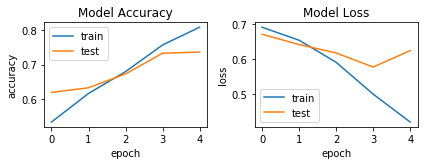

In [52]:
#Plot epoch data
import pandas as pd

data_path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks/'
data_path = os.path.join(data_path,file_name)
epoch_data = pd.read_csv(data_path)
epoch_data.drop(columns=['epoch'],inplace=True)
display(epoch_data)

plt.subplot(2,2,1)
acc_data = epoch_data[['accuracy','val_accuracy']]
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Model Accuracy')
plt.plot(acc_data)
plt.legend(['train','test'])

plt.subplot(2,2,2)
loss_data = epoch_data[['loss','val_loss']]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Model Loss')
plt.plot(loss_data)
plt.legend(['train','test'])

plt.tight_layout()

In [15]:
#Make probability model:
prob_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [16]:
#import pictures of my dog
mydog_path = 'C:/Users/James Sloan/Documents/School/IE 4910 Python ML/Assignments/Project 3 Neural Networks/Squiggy'

#Store data catagories as list
Catagories = ReturnCatagories(main_path=mydog_path)

#Store data as formatted grayscale array, catagory number pairs
mydog_data = FormatImgData(main_path=mydog_path, Catagories=Catagories,
                     IMG_Height=IMG_Height, IMG_Width=IMG_Width)

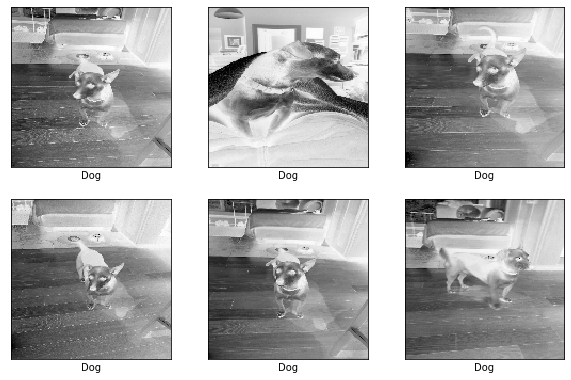

In [17]:
#plot my dog
PlotSomeData(data=mydog_data,Catagories=Catagories,num=6)

In [18]:
#Putting data into X,Y format

dogX, dogY = CreateXY(mydog_data)
dogX = dogX.reshape(-1, IMG_Height, IMG_Width, 1)

In [57]:
#predict whether or not my dog is a dog
dog_predictions = prob_model.predict(dogX)

for prediction in dog_predictions:
    if int(prediction) == 1:
        print('Looks like a dog to me.')
    else:
        print('Looks like a cat to me.')

Looks like a dog to me.
Looks like a dog to me.
Looks like a dog to me.
Looks like a dog to me.
Looks like a dog to me.
Looks like a dog to me.


In [55]:
int(dog_predictions[1])

1